### Theory
TFIDF, viết tắt từ cụm từ tiếng Anh: term frequency–inverse document frequency, là một thống kê số học nhằm phản ánh tầm quan trọng của một từ đối với một văn bản trong một tập hợp hay một ngữ liệu văn bản.

TF-IDF thường dùng dưới dạng là một trọng số trong tìm kiếm truy xuất thông tin, khai thác văn bản, và mô hình hóa người dùng.

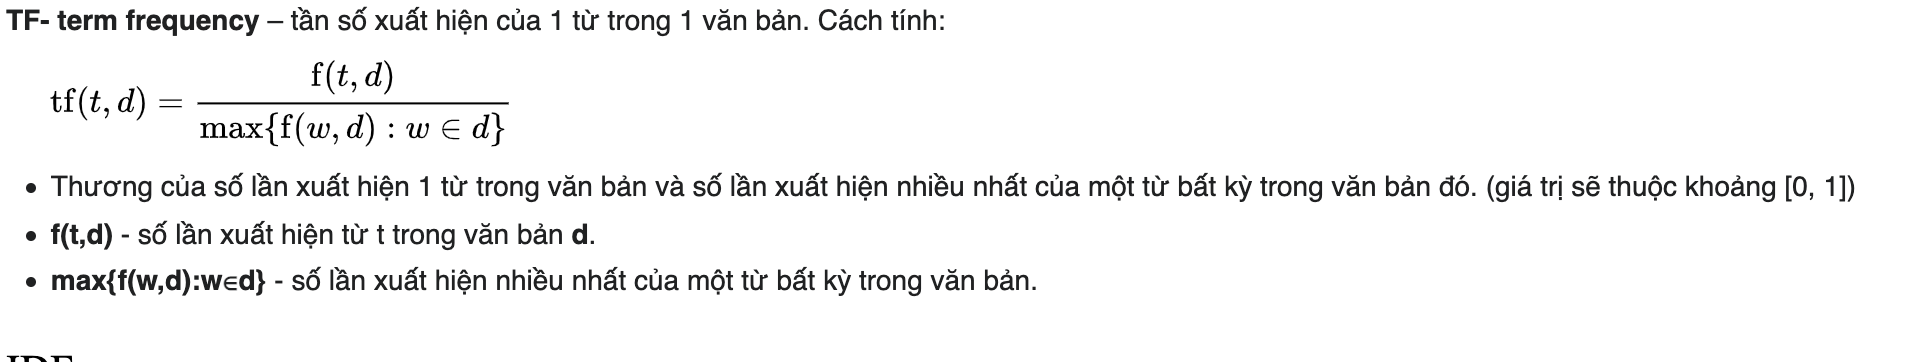



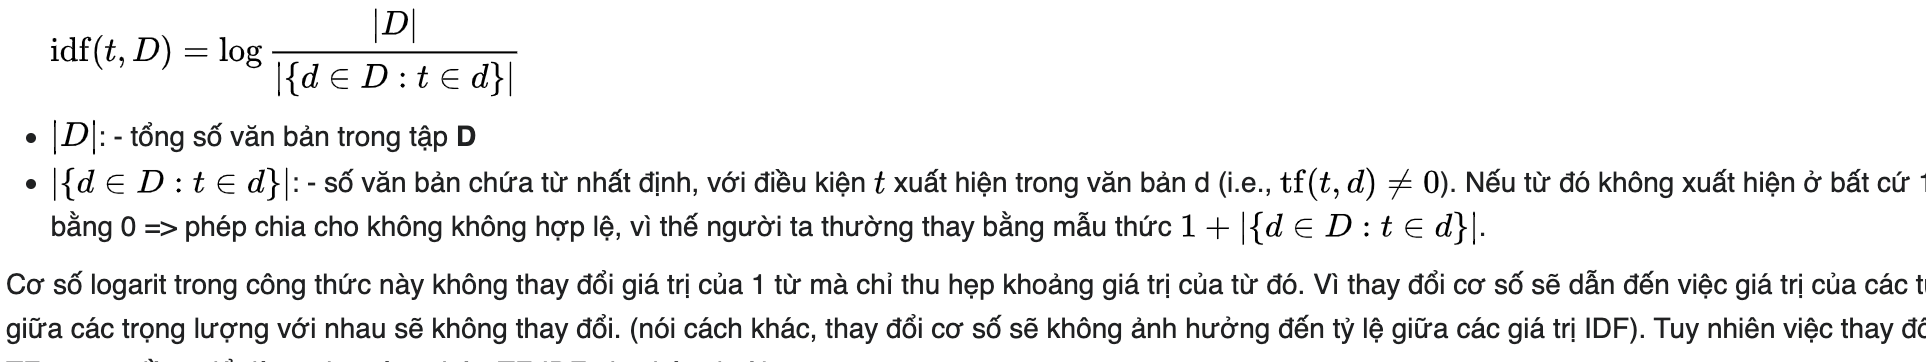


TF-IDF được sử dụng vì 2 lý do : 
Thứ nhất giả sử chúng ta tím kiếm từ 'Tôi rất rất thích môn Bóng Đá ' thì từ 'rất' có thể được xuất hiện rất nhiều tuy nhiên tầm quan trọng của 'Bóng Đá' là quan trọng hơn . TF-IDF giải quyết được vấn đề đấy .

TF-IDF phủ nhận việc xuất hiện của từ có tần xuất xuất hiện cao nhưng không mang nhiều ý nghĩa ..


Tuy nhiên sau khi tính TF-IDF làm sao để xác định được độ giống nhau .

Ở đây ta sử dụng không gian vector , tính toạn độ gần nhau của các vevtor 

### Implementation


Với tất cả lý thuyết đó, tôi sẽ xây dựng Công cụ đề xuất dựa trên nội dung để tính toán sự giống nhau giữa các bộ phim dựa trên thể loại phim. 

Nó sẽ gợi ý những bộ phim giống nhất với một bộ phim cụ thể dựa trên thể loại của nó. 
Để làm như vậy, tôi sẽ sử dụng tệp **movie.csv**.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading ratings file
# Ignore the timestamp column
ratings = pd.read_csv('ratings.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'movie_id', 'rating'])

# Reading users file
users = pd.read_csv('users.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv('movies.csv', sep='\t', encoding='latin-1', usecols=['movie_id', 'title', 'genres'])



In [4]:
# Check the top 5 rows
print(ratings.head())

   user_id  movie_id  rating
0        1      1193       5
1        1       661       3
2        1       914       3
3        1      3408       4
4        1      2355       5


In [5]:
# Check the file info
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   1000209 non-null  int64
 1   movie_id  1000209 non-null  int64
 2   rating    1000209 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB
None


In [6]:
# Check the top 5 rows
print(users.head())

   user_id gender zipcode  age_desc              occ_desc
0        1      F   48067  Under 18          K-12 student
1        2      M   70072       56+         self-employed
2        3      M   55117     25-34             scientist
3        4      M   02460     45-49  executive/managerial
4        5      M   55455     25-34                writer


In [7]:
# Check the file info
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   6040 non-null   int64 
 1   gender    6040 non-null   object
 2   zipcode   6040 non-null   object
 3   age_desc  6040 non-null   object
 4   occ_desc  6040 non-null   object
dtypes: int64(1), object(4)
memory usage: 236.1+ KB
None


In [8]:
# Check the top 5 rows
print(movies.head())

   movie_id                               title  \
0         1                    Toy Story (1995)   
1         2                      Jumanji (1995)   
2         3             Grumpier Old Men (1995)   
3         4            Waiting to Exhale (1995)   
4         5  Father of the Bride Part II (1995)   

                                   genres  
0   ['Animation', "Children's", 'Comedy']  
1  ['Adventure', "Children's", 'Fantasy']  
2                   ['Comedy', 'Romance']  
3                     ['Comedy', 'Drama']  
4                              ['Comedy']  


In [9]:
# Check the file info
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
None


In [ ]:
# Break up the big genre string into a string array
movies['genres'] = movies['genres'].str.split('|')
# Convert genres to string value
movies['genres'] = movies['genres'].fillna("").astype('str')



Tôi sẽ dùng TF-IDFVectorizer của scikit-learn để chuyển các text thành các feature vectors để có thể có thể làm đầu vào cho các công cụ tính toán .


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies['genres'])
tfidf_matrix.shape

(3883, 127)

Tôi sẽ sử dụng Tương tự Cosine để tính toán một đại lượng số biểu thị sự giống nhau giữa hai bộ phim. 
Vì chúng tôi đã sử dụng công cụ Vectorizer TF-IDF, nên việc tính toán Sản phẩm chấm sẽ trực tiếp cho chúng tôi Điểm tương đồng Cosine. 
Do đó, chúng tôi sẽ sử dụng linear_kernel của sklearn thay vì cosine_similities vì nó nhanh hơn nhiều.

In [12]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

array([[1.        , 0.14193614, 0.09010857, 0.1056164 ],
       [0.14193614, 1.        , 0.        , 0.        ],
       [0.09010857, 0.        , 1.        , 0.1719888 ],
       [0.1056164 , 0.        , 0.1719888 , 1.        ]])

Bây giờ tôi có một ma trận độ tương tự theo Cosine của tất cả các phim theo dataset . Bước tiếp theo tôi viết 1 function để trả về 20 phim có độ tương tự cao nhất .


In [13]:
# Build a 1-dimensional array with movie titles
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [15]:
# let's try 
genre_recommendations('Good Will Hunting (1997)').head(20)

25                                        Othello (1995)
26                                   Now and Then (1995)
29     Shanghai Triad (Yao a yao yao dao waipo qiao) ...
30                                Dangerous Minds (1995)
35                               Dead Man Walking (1995)
39                       Cry, the Beloved Country (1995)
42                                    Restoration (1995)
52                                       Lamerica (1994)
54                                        Georgia (1995)
56                          Home for the Holidays (1995)
61                             Mr. Holland's Opus (1995)
66                                       Two Bits (1995)
77                            Crossing Guard, The (1995)
79          White Balloon, The (Badkonake Sefid ) (1995)
81                       Antonia's Line (Antonia) (1995)
82       Once Upon a Time... When We Were Colored (1995)
89                    Journey of August King, The (1995)
92                             

In [16]:
genre_recommendations('Toy Story (1995)').head(20)

1050               Aladdin and the King of Thieves (1996)
2072                             American Tail, An (1986)
2073           American Tail: Fievel Goes West, An (1991)
2285                            Rugrats Movie, The (1998)
2286                                 Bug's Life, A (1998)
3045                                   Toy Story 2 (1999)
3542                                Saludos Amigos (1943)
3682                                   Chicken Run (2000)
3685       Adventures of Rocky and Bullwinkle, The (2000)
236                                 Goofy Movie, A (1995)
12                                           Balto (1995)
241                               Gumby: The Movie (1995)
310                             Swan Princess, The (1994)
592                                      Pinocchio (1940)
612                                Aristocats, The (1970)
700                               Oliver & Company (1988)
876     Land Before Time III: The Time of the Great Gi...
1010          

Với việc mắt thường ta có thể thấy kết quả là khá tốt với việc các bộ Phim Toy Story - thể loại thiếu nhi đã tương tự 
với các phim như Goofy Movie là khá tốt 

### KẾT LUẬN 



Mặt tốt :

Không cần dữ liệu về người dùng khác, do đó không có vấn đề khởi động lạnh hoặc thưa thớt.
Có thể giới thiệu cho người dùng có thị hiếu độc đáo.
Có thể giới thiệu các mặt hàng mới và không phổ biến.
Có thể cung cấp giải thích cho các mục được đề xuất bằng cách liệt kê nội dung-tính năng khiến một mục được đề xuất (trong trường hợp này là thể loại phim)


Tuy nhiên, có một số nhược điểm của việc sử dụng phương pháp này:

Không đề xuất các mục bên ngoài hồ sơ nội dung của người dùng.
Không thể khai thác các đánh giá chất lượng của người dùng khác